In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import The File Name In CSV With Dataframe 

In [7]:
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"
data = pd.read_csv(file_path, sep=";")

# A Dataset Consist of 299 Datapoints

In [8]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,1,90,1,0,2000,3,1165
1,13750,23,72937,1,90,1,0,2000,3,1165
2,13950,24,41711,1,90,1,0,2000,3,1165
3,14950,26,48000,1,90,0,0,2000,3,1165
4,13750,30,38500,1,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
294,13950,42,42560,0,110,1,0,1600,5,1080
295,10950,38,41754,0,110,0,0,1600,3,1040
296,12950,44,41499,2,110,1,0,1600,5,1040
297,12850,40,41339,0,110,1,0,1600,5,1085


In [4]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,1,90,1,0,2000,3,1165
1,13750,23,72937,1,90,1,0,2000,3,1165
2,13950,24,41711,1,90,1,0,2000,3,1165
3,14950,26,48000,1,90,0,0,2000,3,1165
4,13750,30,38500,1,90,0,0,2000,3,1170


In [9]:
data.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
294,13950,42,42560,0,110,1,0,1600,5,1080
295,10950,38,41754,0,110,0,0,1600,3,1040
296,12950,44,41499,2,110,1,0,1600,5,1040
297,12850,40,41339,0,110,1,0,1600,5,1085
298,26950,76,37479,0,110,0,0,1600,5,1085


# Data Summary

In [10]:
data.describe()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,16051.043478,27.394649,47560.341137,0.217391,105.732441,0.762542,0.043478,1622.354515,4.294314,1127.257525
std,4061.015686,11.931492,40063.177984,0.451952,20.058689,0.426239,0.204273,190.835714,0.930650,87.062216
min,4350.000000,1.000000,1500.000000,0.000000,69.000000,0.000000,0.000000,1400.000000,3.000000,1025.000000
25%,12900.000000,19.000000,23087.500000,0.000000,97.000000,1.000000,0.000000,1400.000000,3.000000,1075.000000
50%,15950.000000,28.000000,43000.000000,0.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1110.000000
75%,18850.000000,39.000000,58580.500000,0.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1130.000000
max,32500.000000,76.000000,388494.000000,2.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [8]:

# Calculate mean, median, mode, 25th and 75th percentile, kurtosis, and skewness for each feature
summary_stats = data.describe().transpose()
summary_stats['median'] = data.median()
summary_stats['mode'] = data.mode().iloc[0]
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats['kurtosis'] = data.kurtosis()
summary_stats['skewness'] = data.skew()

# Calculate trimmed mean (excluding 10% from each end)
trimmed_mean = lambda x: np.mean(x.sort_values()[int(len(x)*0.1):-int(len(x)*0.1)])
summary_stats['trimmed_mean'] = data.apply(trimmed_mean)

# Calculate range
range_func = lambda x: x.max() - x.min()
summary_stats['range'] = data.apply(range_func)

# Calculate mean absolute deviation (MAD)
mad_func = lambda x: np.mean(np.abs(x - np.mean(x)))
summary_stats['mad'] = data.apply(mad_func)

# Calculate standard error (SE)
se_func = lambda x: np.std(x) / np.sqrt(len(x))
summary_stats['se'] = data.apply(se_func)

# Print the summary statistics
print(summary_stats)


           count          mean           std     min      25%      50%  \
Price      299.0  16051.043478   4061.015686  4350.0  12900.0  15950.0   
Age        299.0     27.394649     11.931492     1.0     19.0     28.0   
KM         299.0  47560.341137  40063.177984  1500.0  23087.5  43000.0   
FuelType   299.0      0.217391      0.451952     0.0      0.0      0.0   
HP         299.0    105.732441     20.058689    69.0     97.0    110.0   
MetColor   299.0      0.762542      0.426239     0.0      1.0      1.0   
Automatic  299.0      0.043478      0.204273     0.0      0.0      0.0   
CC         299.0   1622.354515    190.835714  1400.0   1400.0   1600.0   
Doors      299.0      4.294314      0.930650     3.0      3.0      5.0   
Weight     299.0   1127.257525     87.062216  1025.0   1075.0   1110.0   

               75%       max   median   mode      IQR   kurtosis  skewness  \
Price      18850.0   32500.0  15950.0  11950   5950.0   1.244859  0.602803   
Age           39.0      76.0 

# Data Info

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      299 non-null    int64
 1   Age        299 non-null    int64
 2   KM         299 non-null    int64
 3   FuelType   299 non-null    int64
 4   HP         299 non-null    int64
 5   MetColor   299 non-null    int64
 6   Automatic  299 non-null    int64
 7   CC         299 non-null    int64
 8   Doors      299 non-null    int64
 9   Weight     299 non-null    int64
dtypes: int64(10)
memory usage: 23.5 KB


# Histogram

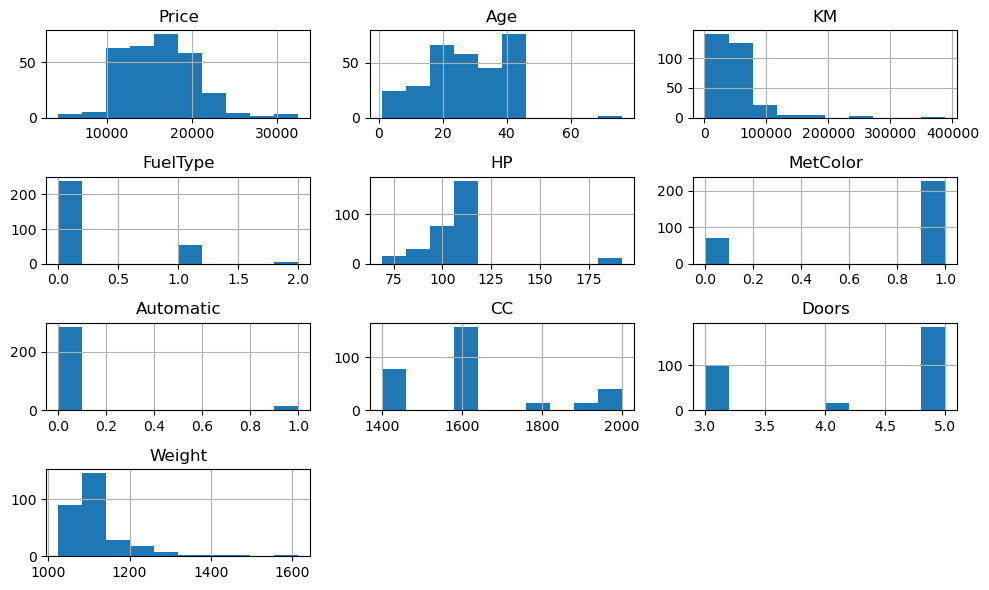

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Plot a histogram
data.hist(figsize=(10, 6))  # Adjust figsize as needed
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

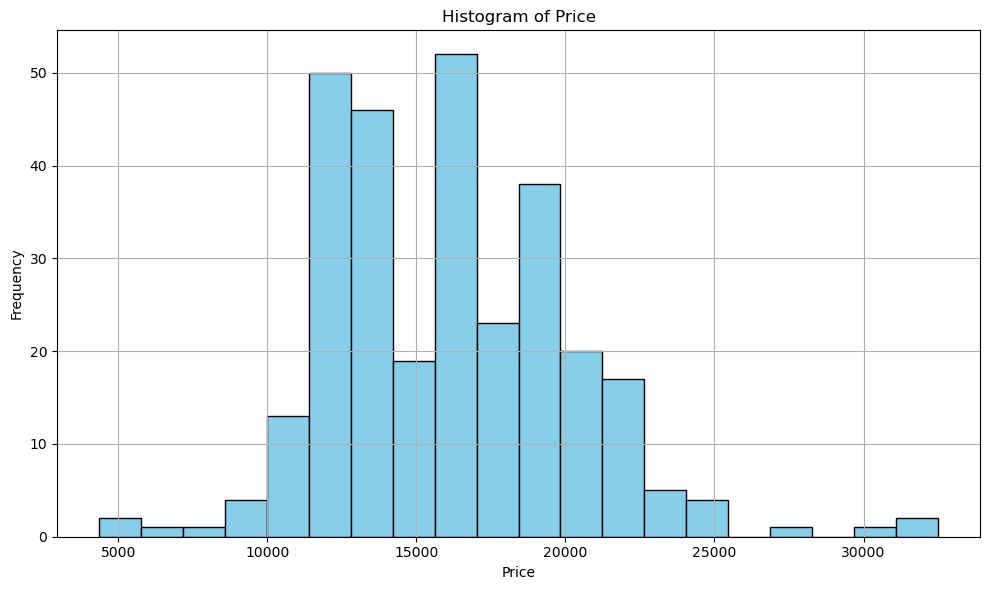

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Plot a histogram for the "Price" column
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


# Boxplot

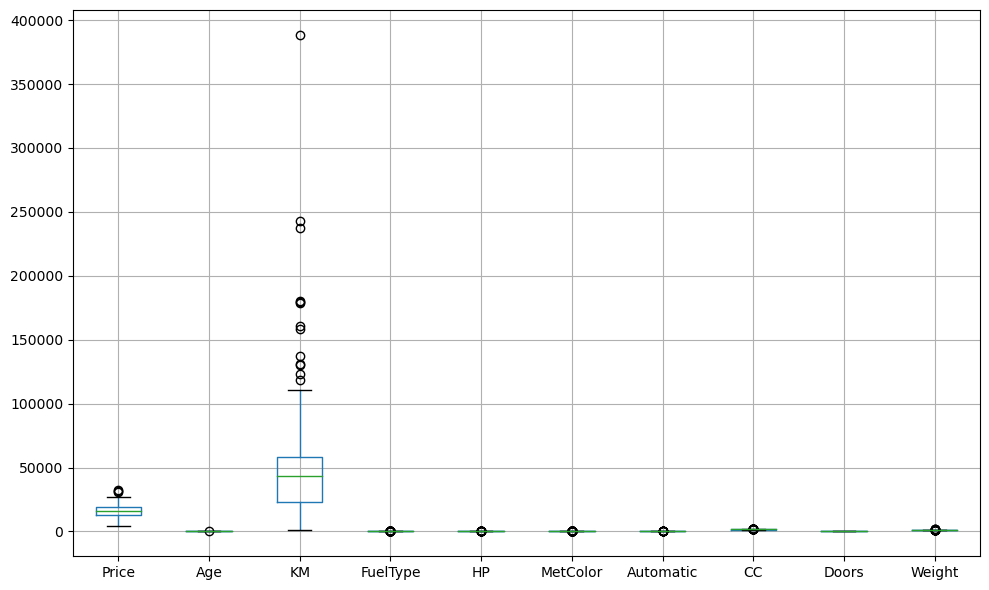

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Plot a boxplot
data.boxplot(figsize=(10, 6))  # Adjust figsize as needed
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


# Correlation Matrix

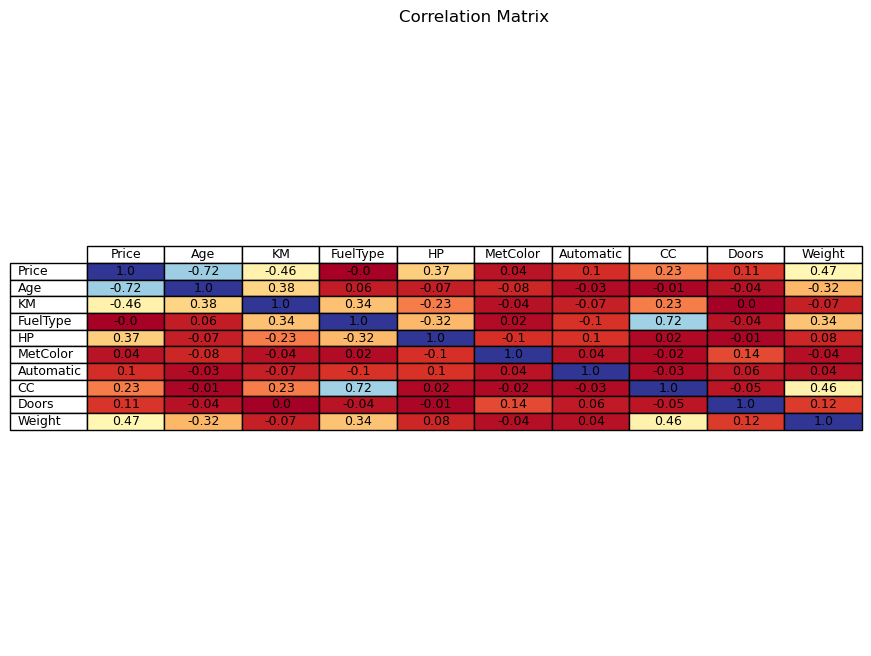

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Create a table-like plot with colors representing correlation values
plt.table(cellText=np.round(correlation_matrix.values, 2),
          rowLabels=correlation_matrix.index,
          colLabels=correlation_matrix.columns,
          loc='center',
          cellColours=plt.cm.RdYlBu(np.abs(correlation_matrix.values)),
          colWidths=[0.1]*len(correlation_matrix.columns),
          cellLoc='center')

# Hide axis
plt.axis('off')

plt.title('Correlation Matrix')

# Show plot
plt.show()


# Color Map for Coefficient Correlations

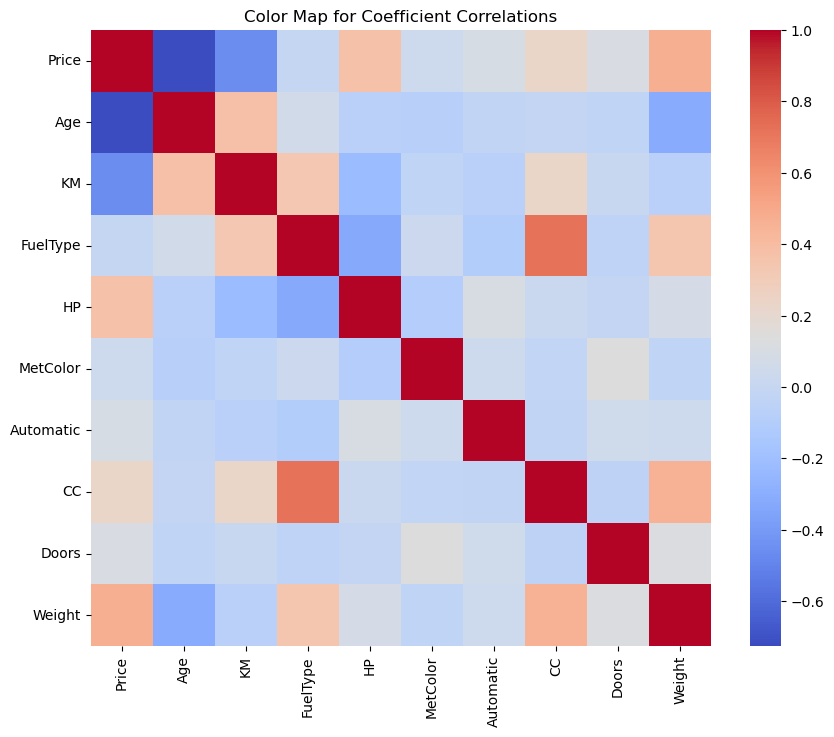

In [10]:
correlation_matrix = data.corr()

# Plot the color map for coefficient correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Color Map for Coefficient Correlations')
plt.show()

# Correlation Scatterplot

C:\Users\pc\AppData\Local\Temp\ipykernel_29428\491243970.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(data.columns), len(data.columns), i * len(data.columns) + j + 1)


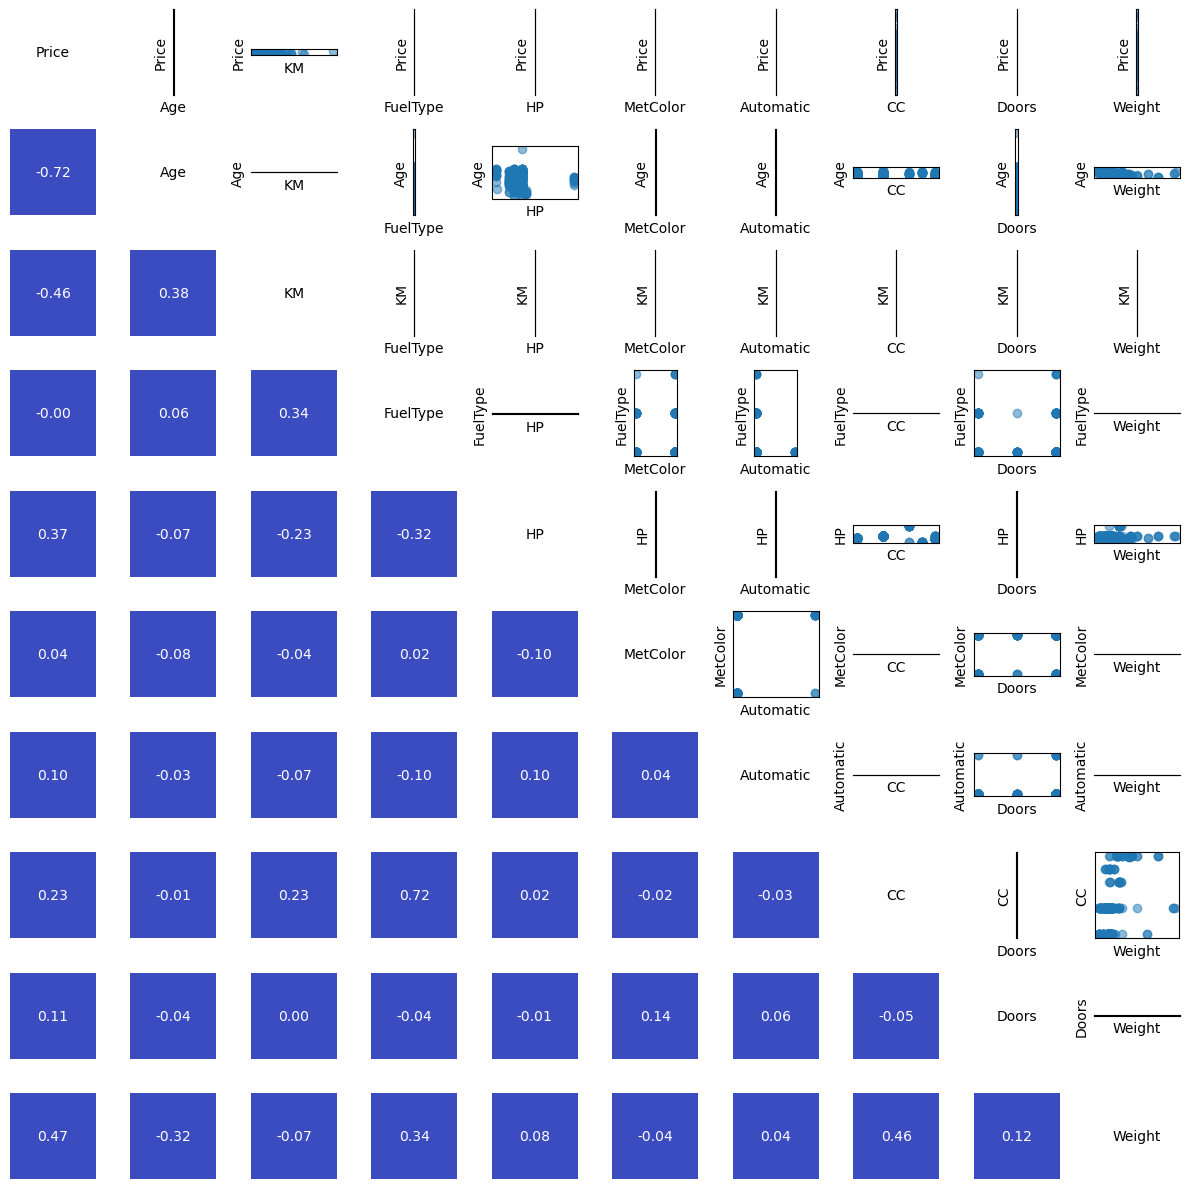

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 12))

# Create scatterplots for the upper right triangle
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i > j:
            ax = plt.subplot(len(data.columns), len(data.columns), i * len(data.columns) + j + 1)
            sns.heatmap(np.array([[correlation_matrix.loc[data.columns[i], data.columns[j]]]]),
                        cmap='coolwarm', annot=True, fmt=".2f", cbar=False, square=True, ax=ax)
            plt.xticks([])
            plt.yticks([])
            plt.xlabel('')
            plt.ylabel('')

# Create scatterplots for the lower left triangle
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i < j:
            ax = plt.subplot(len(data.columns), len(data.columns), i * len(data.columns) + j + 1)
            ax.scatter(data.iloc[:, j], data.iloc[:, i], alpha=0.5)
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(data.columns[j])
            plt.ylabel(data.columns[i])
            ax.set_aspect('equal')  # Set aspect ratio to make circles look like ellipses

# Plot the diagonal line for 10 attributes
for i in range(len(data.columns)):
    ax = plt.subplot(len(data.columns), len(data.columns), i * len(data.columns) + i + 1)
    ax.text(0.5, 0.5, data.columns[i], ha='center', va='center', fontsize=10)
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Training and Testing Data

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Features (X) and target variable (y)
X = data[['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (239, 9) (239,)
Testing set shape: (60, 9) (60,)


# Regression Model Trial 1

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Features (X) and target variable (y)
X = data[['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to X_train
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     60.76
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           9.18e-56
Time:                        17:24:09   Log-Likelihood:                -2170.9
No. Observations:                 239   AIC:                             4362.
Df Residuals:                     229   BIC:                             4397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3823.0515   2495.812      1.532      0.1

# ANOVA Model 1 

In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Features (X) and target variable (y)
X = data[['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']]
y = data['Price']

# Fit the ANOVA model
formula = 'Price ~ Age + KM + FuelType + HP + MetColor + Automatic + CC + Doors + Weight'
model = ols(formula, data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)






                 sum_sq     df           F        PR(>F)
Age        1.205271e+09    1.0  270.916330  2.104394e-43
KM         1.724693e+08    1.0   38.767008  1.677778e-09
FuelType   1.565176e+05    1.0    0.035181  8.513476e-01
HP         2.562057e+08    1.0   57.588977  4.468558e-13
MetColor   5.640490e+05    1.0    0.126785  7.220490e-01
Automatic  5.457066e+06    1.0    1.226619  2.689865e-01
CC         6.543357e+07    1.0   14.707916  1.541201e-04
Doors      2.790017e+07    1.0    6.271296  1.282192e-02
Weight     7.879826e+07    1.0   17.711981  3.434403e-05
Residual   1.285723e+09  289.0         NaN           NaN


# Regression Analysis Model 2 

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Specify the file path
file_path = r"C:\Users\pc\Desktop\dataset\newcardataset.csv"

# Read the CSV file with custom separator
data = pd.read_csv(file_path, sep=";")

# Features (X) and target variable (y)
X = data[['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']]  # Include only significant variables
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to X_train
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     91.29
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.92e-58
Time:                        19:38:03   Log-Likelihood:                -2171.9
No. Observations:                 239   AIC:                             4358.
Df Residuals:                     232   BIC:                             4382.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3403.7090   2223.377      1.531      0.1

# ANOVA Trial 2 

In [17]:
# Features (X) and target variable (y)
X = data[['Age', 'KM', 'HP','CC', 'Doors', 'Weight']]
y = data['Price']

# Fit the ANOVA model
formula = 'Price ~ Age + KM + HP + CC + Doors + Weight'
model = ols(formula, data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df           F        PR(>F)
Age       1.219818e+09    1.0  275.690216  4.675215e-44
KM        1.785510e+08    1.0   40.354195  8.105053e-10
HP        3.243936e+08    1.0   73.315982  6.429606e-16
CC        1.294144e+08    1.0   29.248876  1.326144e-07
Doors     3.104563e+07    1.0    7.016602  8.515183e-03
Weight    8.176392e+07    1.0   18.479411  2.343273e-05
Residual  1.291982e+09  292.0         NaN           NaN


# Residual and Normal Q-Q Plots

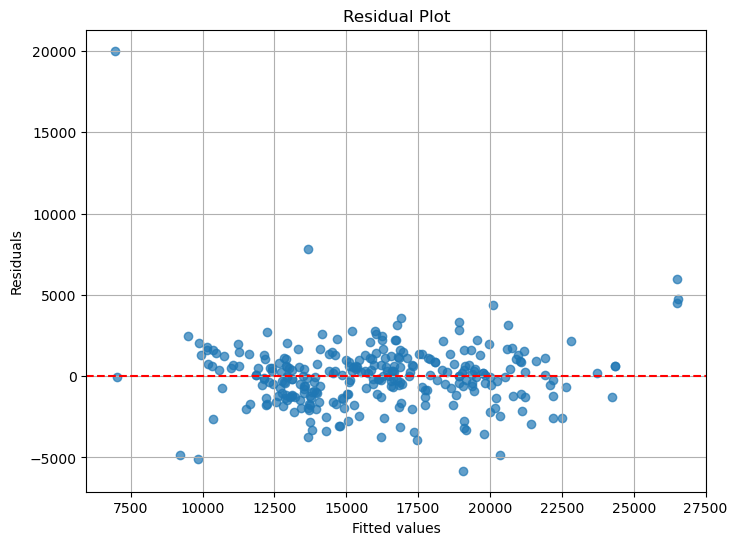

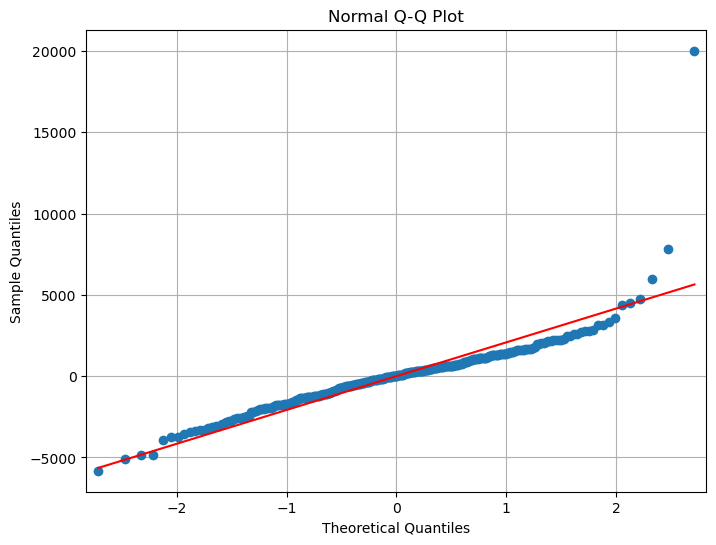

In [18]:
# Fit the ANOVA model
formula = 'Price ~ Age + KM + HP + CC + Doors + Weight'
model = sm.formula.ols(formula, data=data).fit()

# Calculate residuals
residuals = model.resid

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.7)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Normal Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Normal Q-Q Plot')
plt.grid(True)
plt.show()



# Actual and Predicted Prices

In [22]:
# Assuming you have already trained the model and have the test data (X_test)
# Add constant to X_test
X_test = sm.add_constant(X_test)

# Make predictions on the test data
predictions = model.predict(X_test)

# Create a DataFrame to display predictions
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})

In [23]:
# Print the DataFrame
print(predictions_df)

     Actual Price  Predicted Price
281         12950     13538.798780
265         11950     13956.030303
164         17650     18810.181684
9           12950     14929.866043
77          18450     16957.206107
278         12750     11278.264267
93          15950     15760.610354
109         32500     26522.687047
5           12950     15427.925259
173         18950     19379.067954
97          15950     16191.662692
195         11950     13101.745465
184         17795     19997.332467
154         21750     19544.164740
57          15250     17295.454174
60          14950     16060.612193
147         24500     20112.761149
108         17950     17896.671252
63          17950     16264.286180
140         16450     16923.827255
155         16868     17749.123176
104         19450     19841.229602
247         12900     12942.215339
46          17950     17317.012333
42          13950     15070.736999
275         11480     13423.070253
280         12950     12941.853588
116         21950   

In [25]:
# Print the head of the DataFrame
print(predictions_df.head())

     Actual Price  Predicted Price
281         12950     13538.798780
265         11950     13956.030303
164         17650     18810.181684
9           12950     14929.866043
77          18450     16957.206107


# Correlation Accuracy

In [35]:
# Actual values (y_test) and predicted values (predictions)
actuals = y_test.values
predicted = predictions.values

# Calculate correlation accuracy
correlation_accuracy = np.corrcoef(actuals, predicted)[0, 1]

# Print the correlation accuracy
print("Correlation Accuracy:", correlation_accuracy)

Correlation Accuracy: 0.9339666269325367


# Scatter Plot Actual vs Predicted Prices

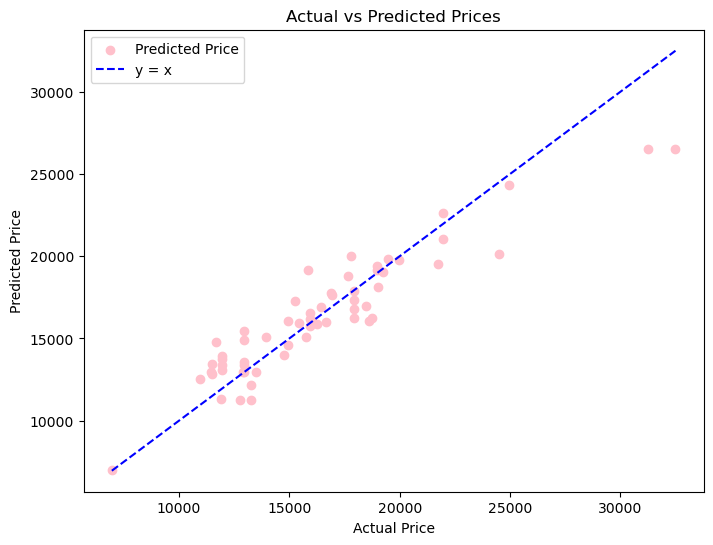

In [37]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='pink', label='Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='y = x')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
